In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Importing data frame
df= pd.read_csv("data/boston.csv")

In [3]:
#testing data frame
print(df.head(1))

      CRIM    ZN  NDUS  CHAS    NOX     RM   AGE   DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0  2.31     0  0.538  6.575  65.2  4.09    1  296     15.3   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  


In [4]:
#testing data frame
df.at[3,"NOX"]

0.458

## Looking for best predictor of MEDV (nitric oxides concentration)

In [5]:
# Calculating each correlation to MEDV
print("The correlation between:\n")
corrCRIM = np.corrcoef(df.CRIM, df.MEDV)[0,1]
print("MEDV and CRIM is",corrCRIM.round(2))

corrZN = np.corrcoef(df.ZN, df.MEDV)[0,1]
print("MEDV and ZN is",corrZN.round(2))

corrNDUS = np.corrcoef(df.NDUS, df.MEDV)[0,1]
print("MEDV and NDUS is",corrNDUS.round(2))

corrCHAS = np.corrcoef(df.CHAS, df.MEDV)[0,1]
print("MEDV and CHAS is",corrCHAS.round(2))

corrRM = np.corrcoef(df.RM, df.MEDV)[0,1]
print("MEDV and RM is",corrRM.round(2))

corrAGE = np.corrcoef(df.AGE, df.MEDV)[0,1]
print("MEDV and AGE is",corrAGE.round(2))

corrDIS = np.corrcoef(df.DIS, df.MEDV)[0,1]
print("MEDV and DIS is",corrDIS.round(2))

corrRAD = np.corrcoef(df.RAD, df.MEDV)[0,1]
print("MEDV and RAD is",corrRAD.round(2))

corrTAX = np.corrcoef(df.TAX, df.MEDV)[0,1]
print("MEDV and TAX is",corrTAX.round(2))

corrPTRATIO = np.corrcoef(df.PTRATIO, df.MEDV)[0,1]
print("MEDV and PTRATIO is",corrPTRATIO.round(2))

corrB = np.corrcoef(df.B, df.MEDV)[0,1]
print("MEDV and B is",corrB.round(2))

corrLSTAT = np.corrcoef(df.LSTAT, df.MEDV)[0,1]
print("MEDV and LSTAT is",corrLSTAT.round(2))

corrNOX = np.corrcoef(df.NOX, df.MEDV)[0,1]
print("MEDV and NOX is",corrNOX.round(2))

The correlation between:

MEDV and CRIM is -0.39
MEDV and ZN is 0.36
MEDV and NDUS is -0.48
MEDV and CHAS is 0.18
MEDV and RM is 0.7
MEDV and AGE is -0.38
MEDV and DIS is 0.25
MEDV and RAD is -0.38
MEDV and TAX is -0.47
MEDV and PTRATIO is -0.51
MEDV and B is 0.33
MEDV and LSTAT is -0.74
MEDV and NOX is -0.43


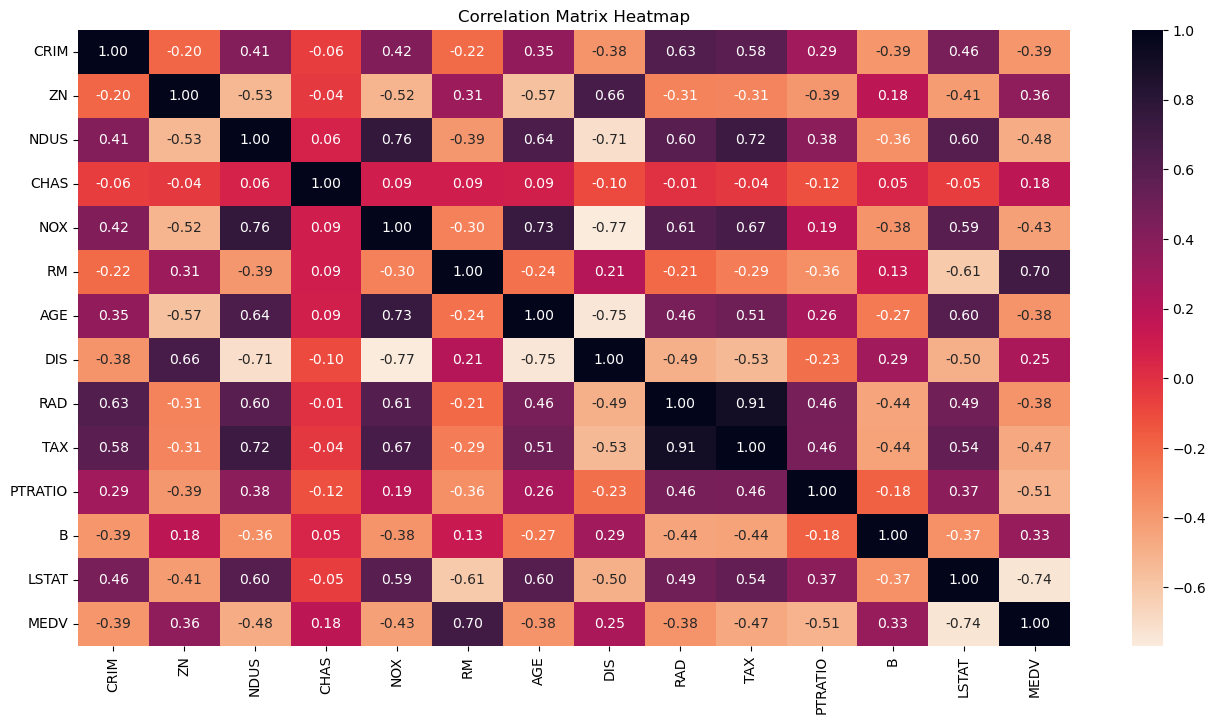

In [6]:
#Evaluating all variables at the same time
# Making a correlation matrix
corrMatrix = df.corr()

# Plotting as a heat map 
rocket_r_cmap = sns.color_palette("rocket_r", as_cmap=True)
plt.figure(figsize=(16, 8)) 
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap=rocket_r_cmap, cbar=True)

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Selecting the variables that have a correlation to MEDV above 0.6 for visualizing a scatter plot and regression. They are: RM and LSTAT 

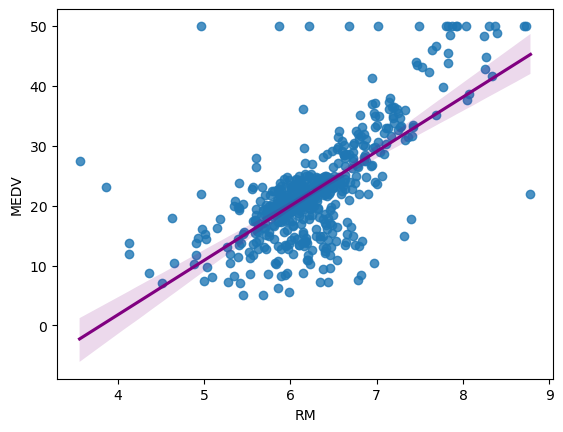

In [7]:
#MEDV – median value of owner-occupied homes in $1000’s  
#RM – average number of rooms per dwelling 
sns.regplot(x='RM', y='MEDV', data=df, line_kws={"color": "purple"})
plt.show()

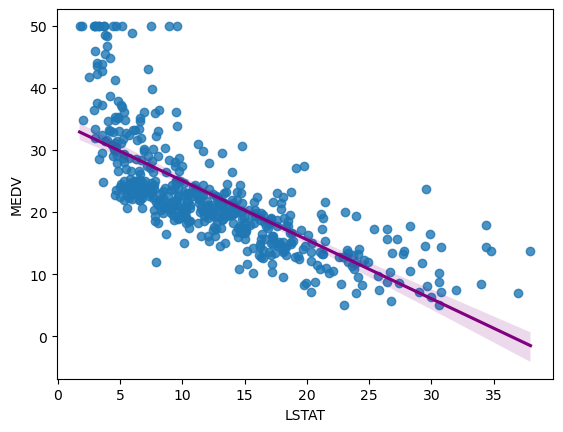

In [8]:
#MEDV – median value of owner-occupied homes in $1000’s  
#LSTAT –% lower status of the population 
sns.regplot(x='LSTAT', y='MEDV', data=df, line_kws={"color": "purple"})
plt.show()

### RM and LSTAT appears to be variables to best predictor of MEDV
average number of rooms per dwelling and lower status of the population could be the predictors of value of owner-occupied homes

In [9]:
# Calculate linear regression values for RM, where RM is the constant 
X = sm.add_constant(df["RM"])
Y = df["MEDV"]

# OLS method used for estimating the linear regression
model = sm.OLS(Y, X).fit()  

# Printing
print("Slope:", model.params[1])
print("Intercept:", model.params[0])
print(model.summary())

Slope: 9.102108981180319
Intercept: -34.67062077643861
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 09 May 2025   Prob (F-statistic):           2.49e-74
Time:                        18:31:22   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

#### From the visualizations, RM has a high correlation to MEDV 0.7 and the linear regression analysis suggest a significant relationship . 

The slope indicates a positive relationship between RM and MEDV; as the number of rooms per dwelling increases, the median value of homes also increases.
The R-squared value of 0.484, suggesting that 48.4% of the variance in MEDV is directly related to RM. 
The F-statistic with a very low p-value of 2.49e-74, indicates the the relationship highly significant. 

In [10]:
# Calculate linear regression values for LSTAT, where LSTAT is the constant 
X = sm.add_constant(df["LSTAT"])
Y = df["MEDV"]

# OLS method used for estimating the linear regression
model = sm.OLS(Y, X).fit()  

# Printing
print("Slope:", model.params[1])
print("Intercept:", model.params[0])
print(model.summary())

Slope: -0.9500493537579902
Intercept: 34.55384087938309
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 09 May 2025   Prob (F-statistic):           5.08e-88
Time:                        18:31:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

#### From the visualizations, LSTAT has a high correlation to MEDV -0.74 and the linear regression analysis also suggest a significant negative relationship. 

The slope indicates a strong negative relationship between LSTAT and MEDV. This suggests that as the percentage of lower-status population increases, the median value of homes tends to decrease. The intercept of 34.5538 means that if the percentage of the lower-status population were zero, the predicted median home value would be approximately $34,554. The very low p-value associated with the LSTAT coefficient (near zero) demonstrates that the relationship is unlikely to occur by chance. The R-squared suggests that about 54.4% of the variability in MEDV can be explained by LSTAT alone, indicating that LSTAT is a strong predictor of MEDV. The F-statistic and the p-value of 5.08e-88 also support this relationship as statistically significant.